**Bank Marketing PPT** https://drive.google.com/file/d/1EDGc2kvBF3RWuZa88dNhmp9kho59i38C/view?usp=drive_link

**Classification: Bank marketing dataset**




Description: The dataset contains data related to direct marketing campaign of Portuguese banking sector. You have to predict a particular customer will subscribe a term deposit or not Objective: Predict a particular customer will subscribe a term deposit or not

In [ ]:
#importing libraries
import numpy as np    #numerical computations
import pandas as pd   #data manipulation and analysis
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/bank 1.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df_cat = df.select_dtypes(np.object)
df_cat

<ipython-input-74-66775d69e6bc>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat = df.select_dtypes(np.object)


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [ ]:
numerical_cols = ['age','balance','day','campaign','pdays','previous']
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

In [ ]:
for col in categorical_cols:
  print(col,df[col].unique())

job ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital ['married' 'single' 'divorced']
education ['primary' 'secondary' 'tertiary' 'unknown']
default ['no' 'yes']
housing ['no' 'yes']
loan ['no' 'yes']
contact ['cellular' 'unknown' 'telephone']
month ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome ['unknown' 'failure' 'other' 'success']
y ['no' 'yes']


In [ ]:
df.shape

(4521, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


**Checking missing values:**

In [ ]:
df.isnull().values.any()

False

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.duplicated().sum()

0

**checking outliers**

<Axes: >

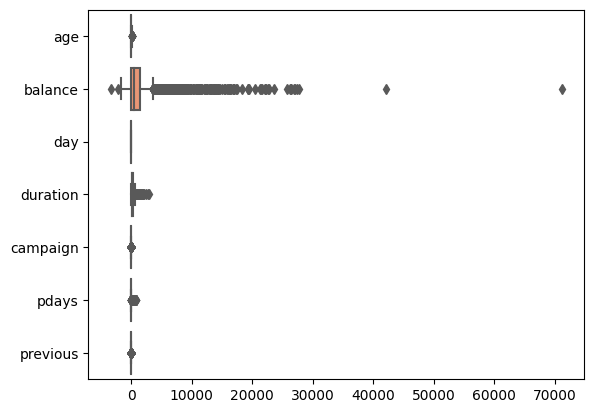

In [ ]:
import seaborn as sns
sns.boxplot(data=df, orient="h", palette="Set2", dodge=False)

In [ ]:
# Assuming 'df' is your DataFrame and 'column_name' is the column of interest
column_name = 'balance'
data = df[column_name]

# Calculate IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers_count = ((data < lower_bound) | (data > upper_bound)).sum()

print(f"Number of outliers in {column_name}: {outliers_count}")

Number of outliers in balance: 506


In [ ]:
# Use the value_counts() function to get the count of each unique value in the "target" column
target_counts = df_new['y'].value_counts()

# Print the result
print(target_counts)

no     3917
yes     516
Name: y, dtype: int64


**EDA**

**Univariate analysis of Categorical columns**<br>
Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.<br>

If the variable is categorical we can use either a bar chart or a pie chart to find the distribution of the classes in the variable.<br>

The code plots the frequency of all the values in the categorical variables.

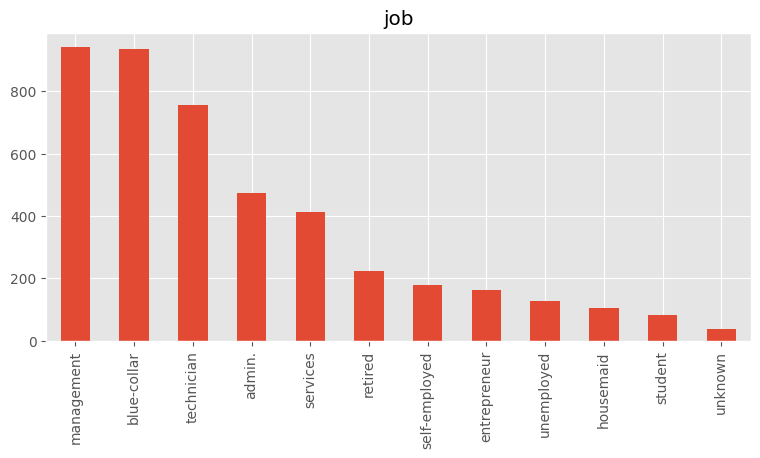

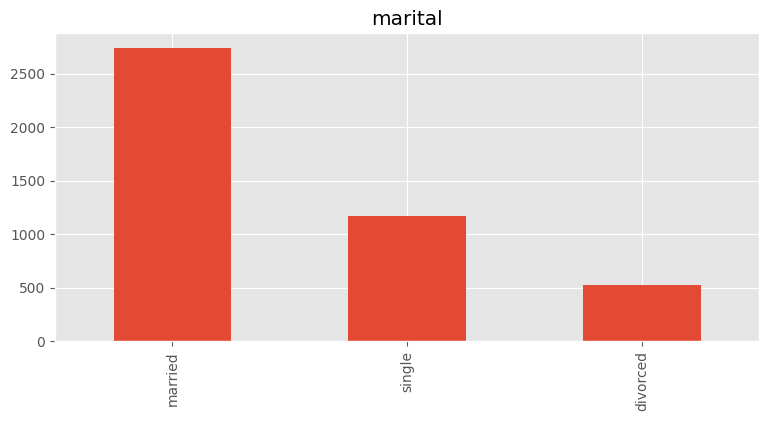

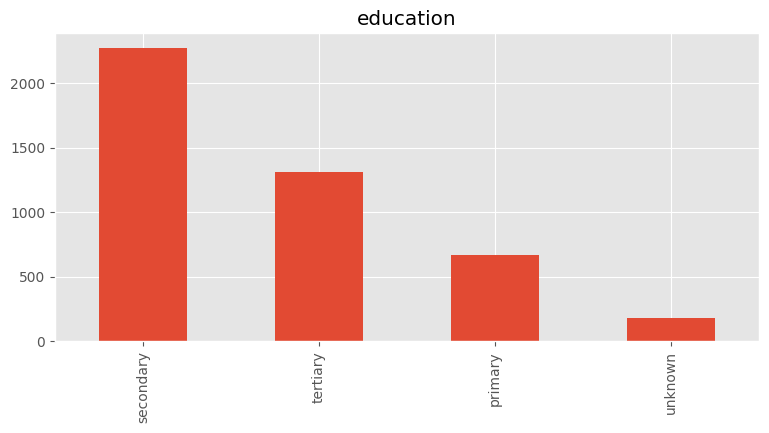

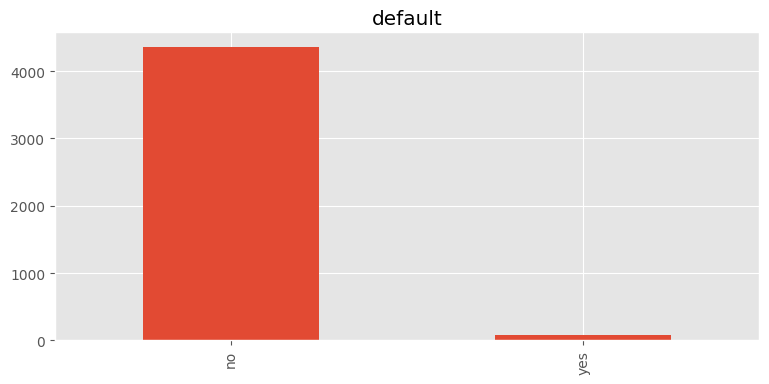

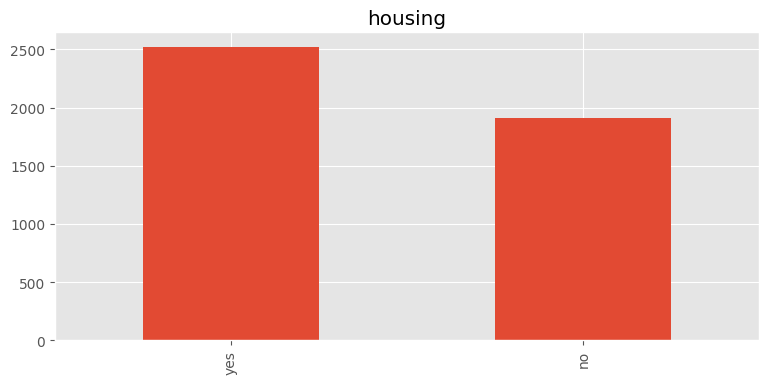

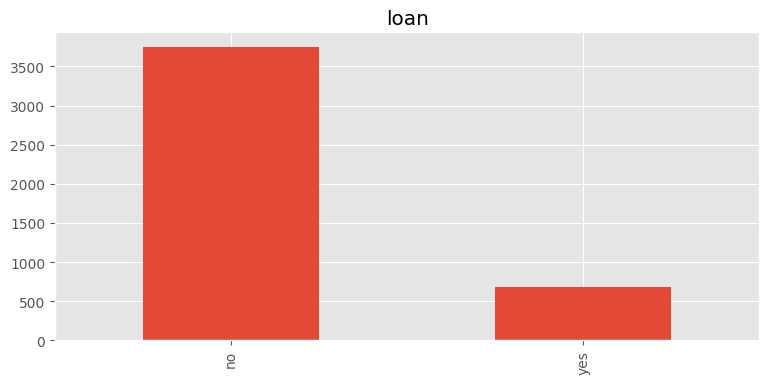

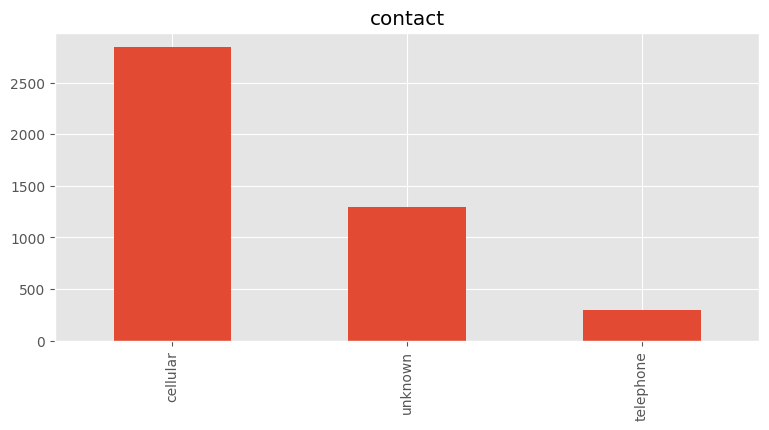

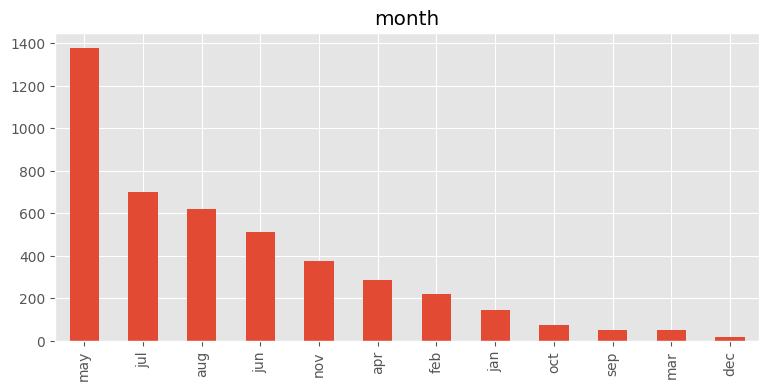

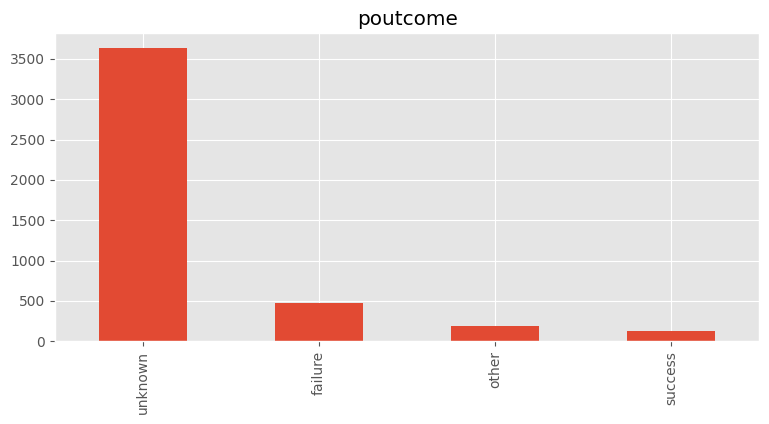

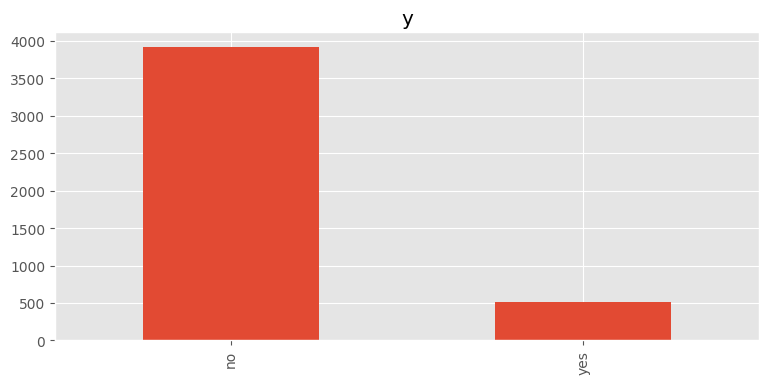

In [ ]:
# Selecting the categorical columns
categorical_col = df_new.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df_new[column].value_counts().plot(kind='bar')
    plt.title(column)

**Univariate analysis of Continuous columns**<br>
Just like for categorical columns, by performing a univariate analysis on the continuous columns, we can get a sense of the distrbution of values in every column and of the outliers in the data. Histograms are great for plotting the distribution of the data and boxplots are the best choice for visualizing outliers.<br>

The code below plots a histogram of all the continuous features

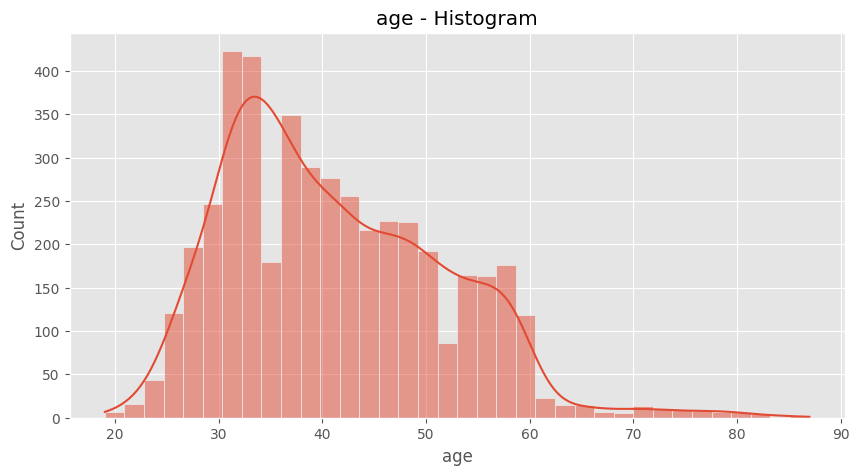

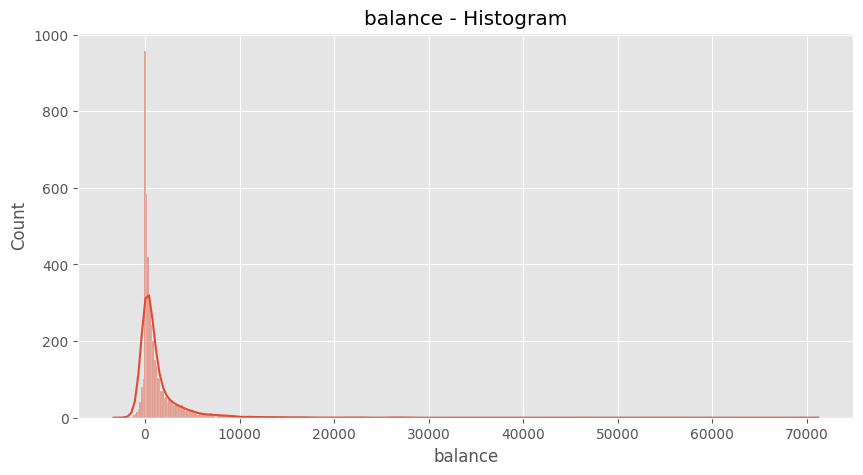

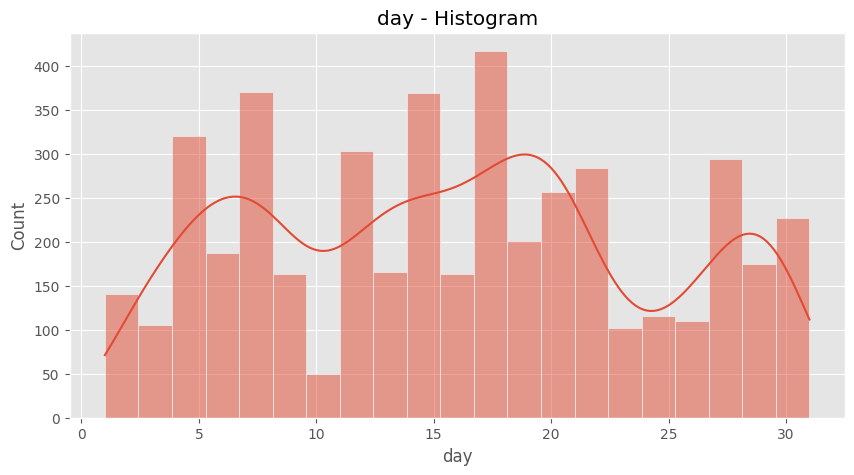

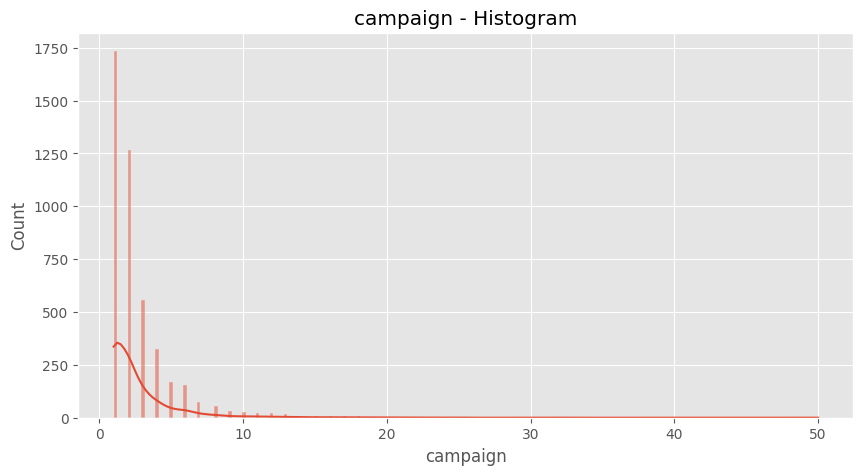

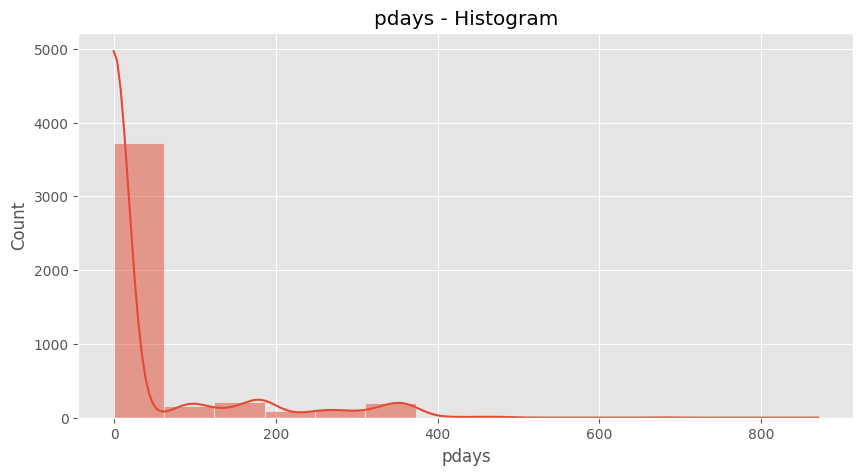

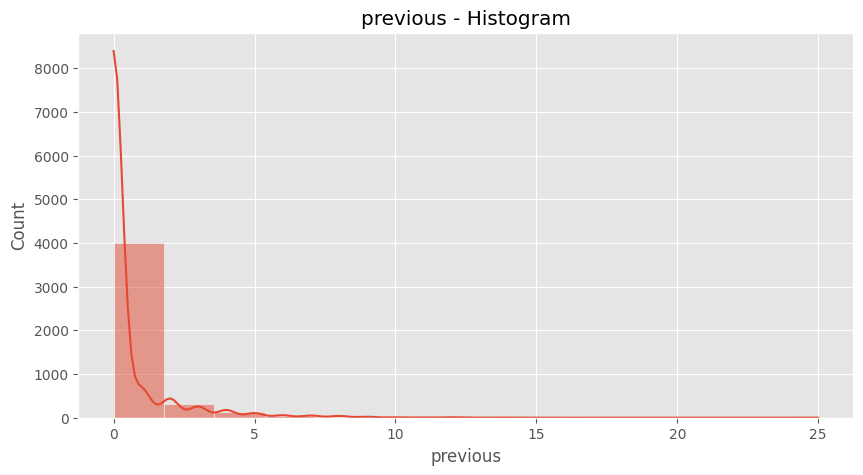

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming numerical_cols is a list of numerical column names
for column in numerical_cols:
    plt.figure(figsize=(10, 5))

    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'{column} - Histogram')

    plt.show()

**Bivariate Analysis - Categorical Columns**<br>
Bivariate analysis involves checking the relationship between two variables simultaneously. In the code below, we plot every categorical feature against the target by plotting a barchart.

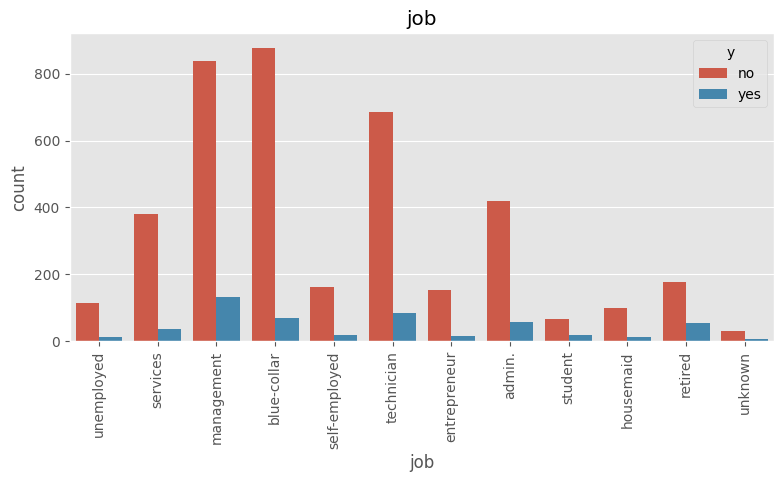

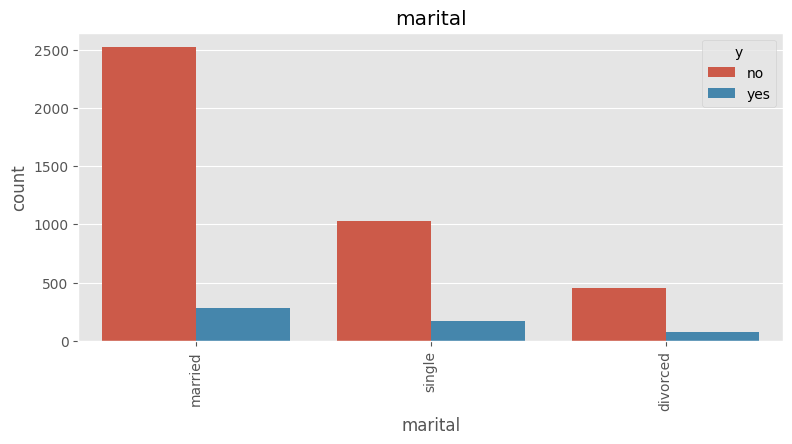

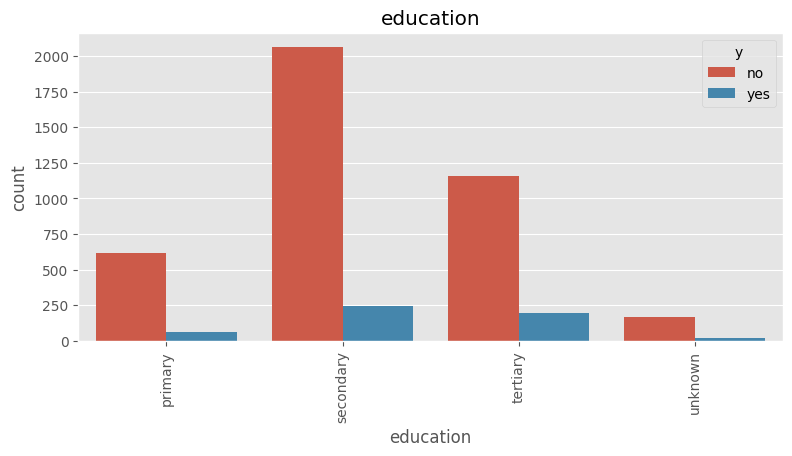

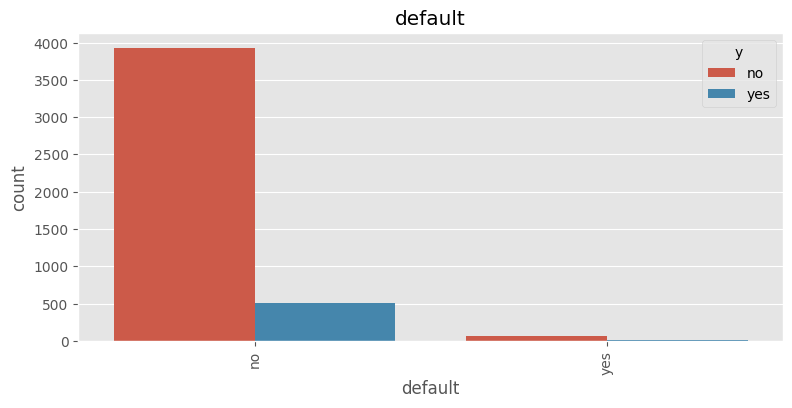

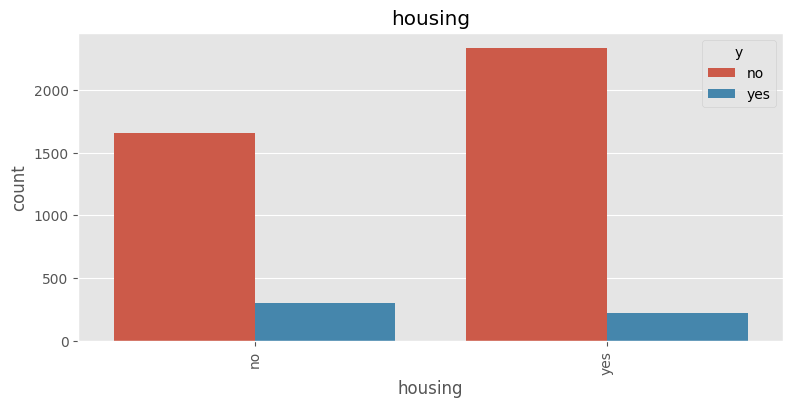

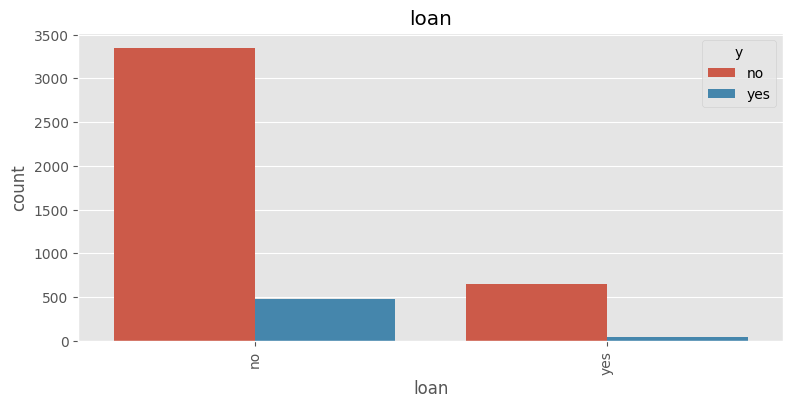

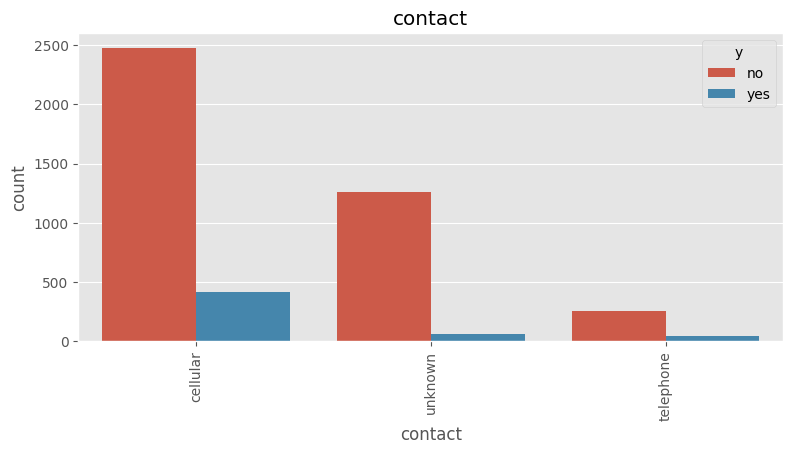

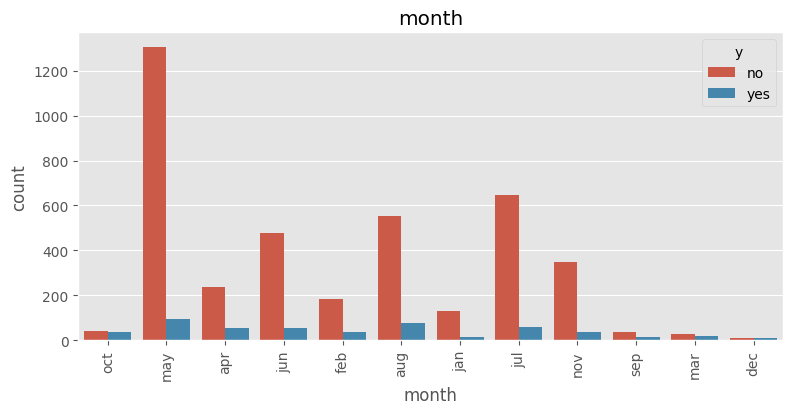

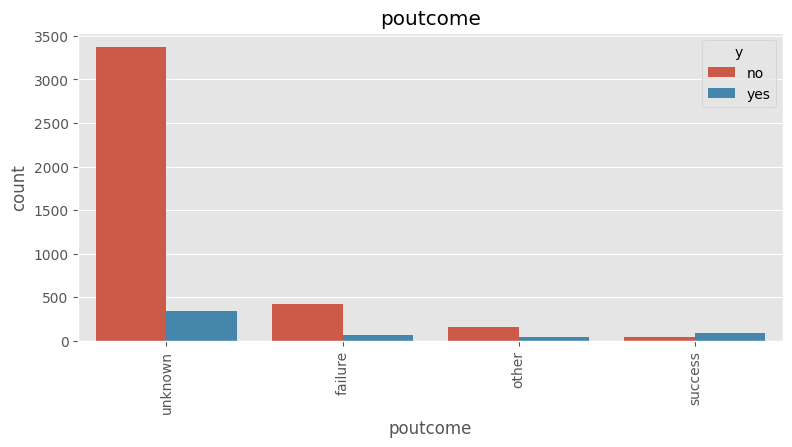

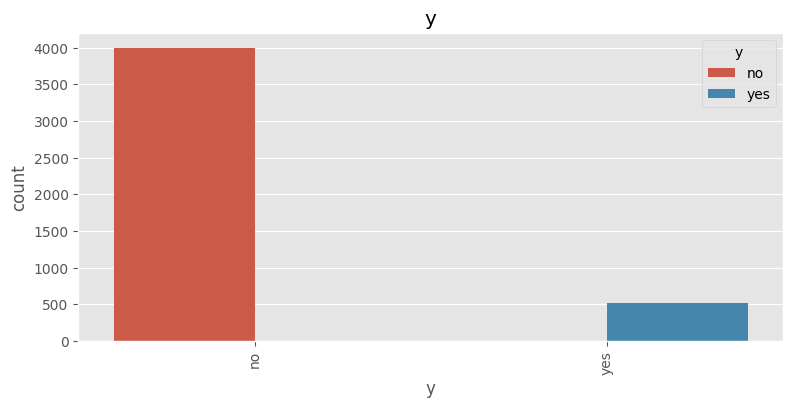

In [ ]:
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=df[column],hue=df['y'],data=df)
    plt.title(column)
    plt.xticks(rotation=90)

Data Visualization Pair plot that includes all the columns of the data frame :-

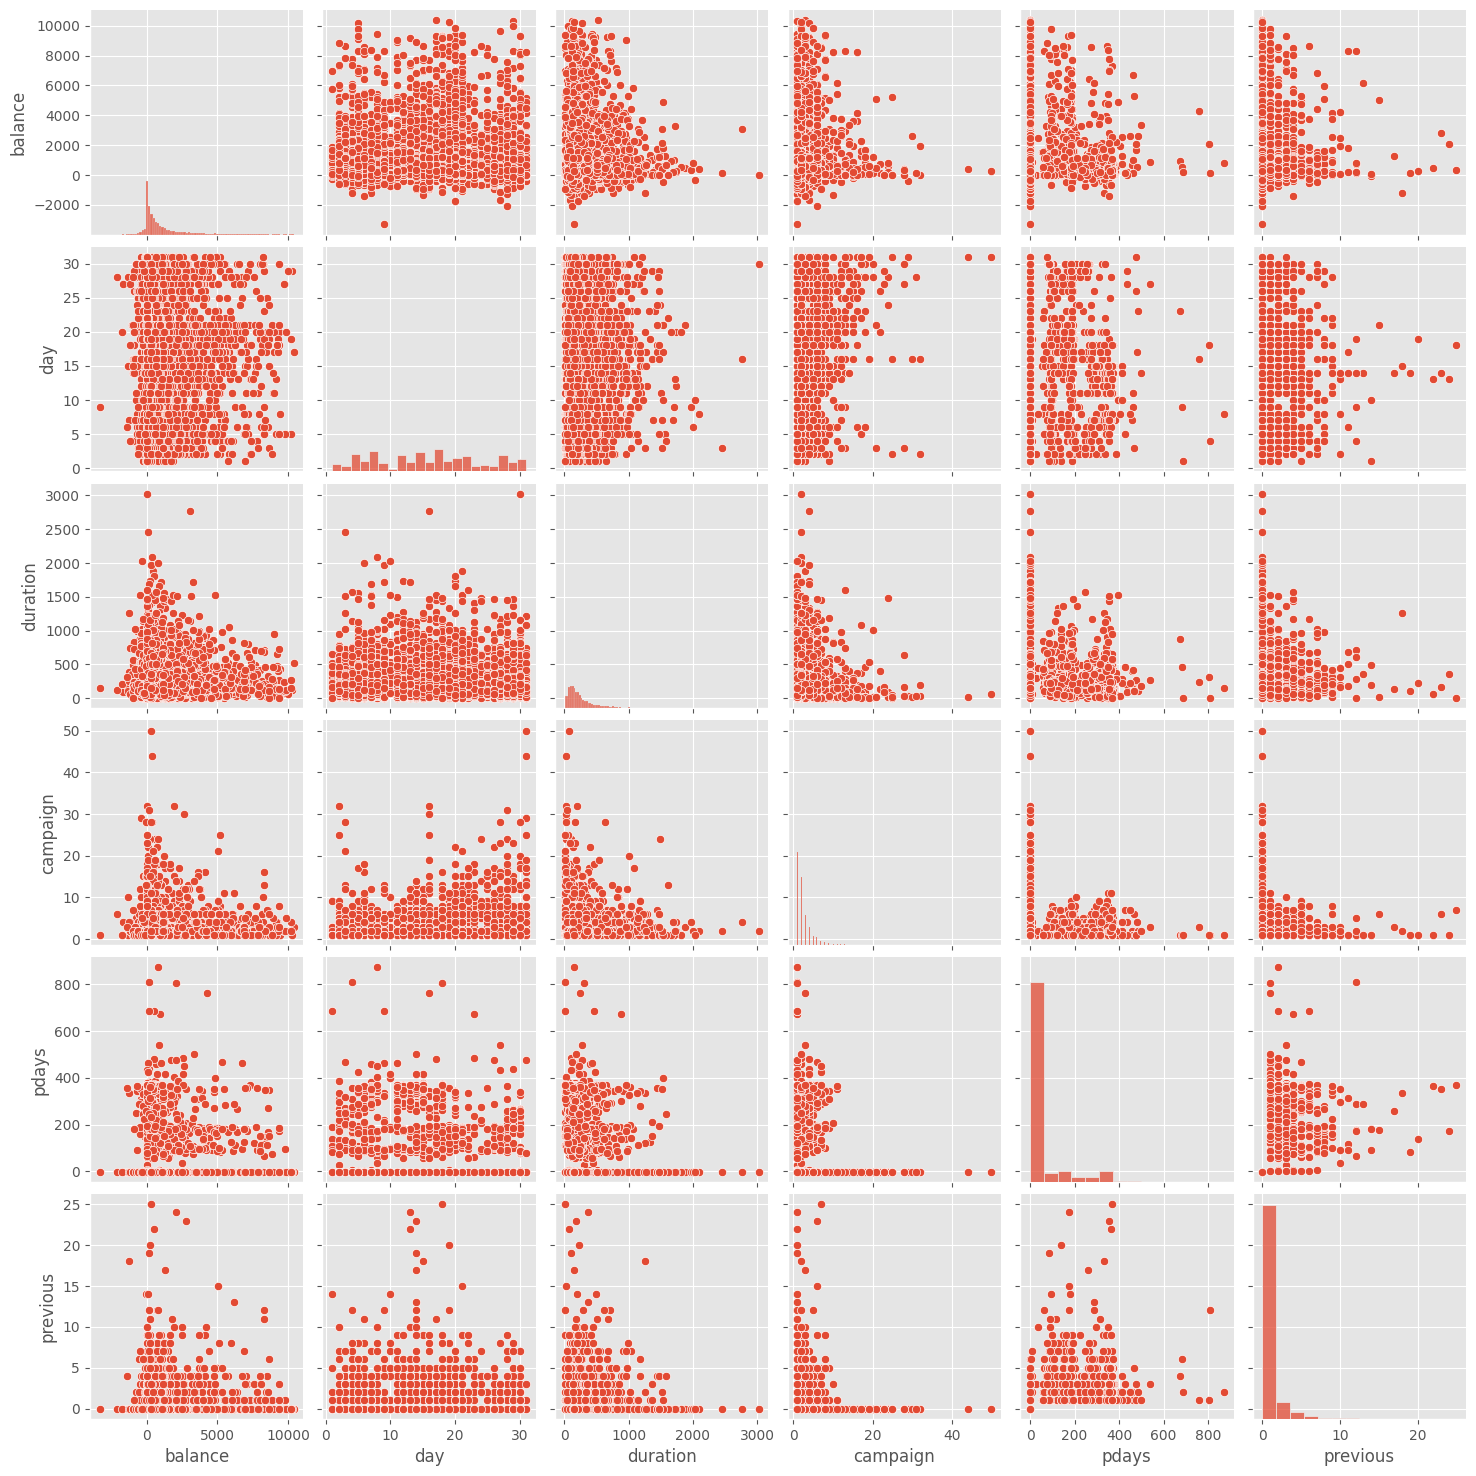

In [ ]:
sns.pairplot(df_new.iloc[:,1:])

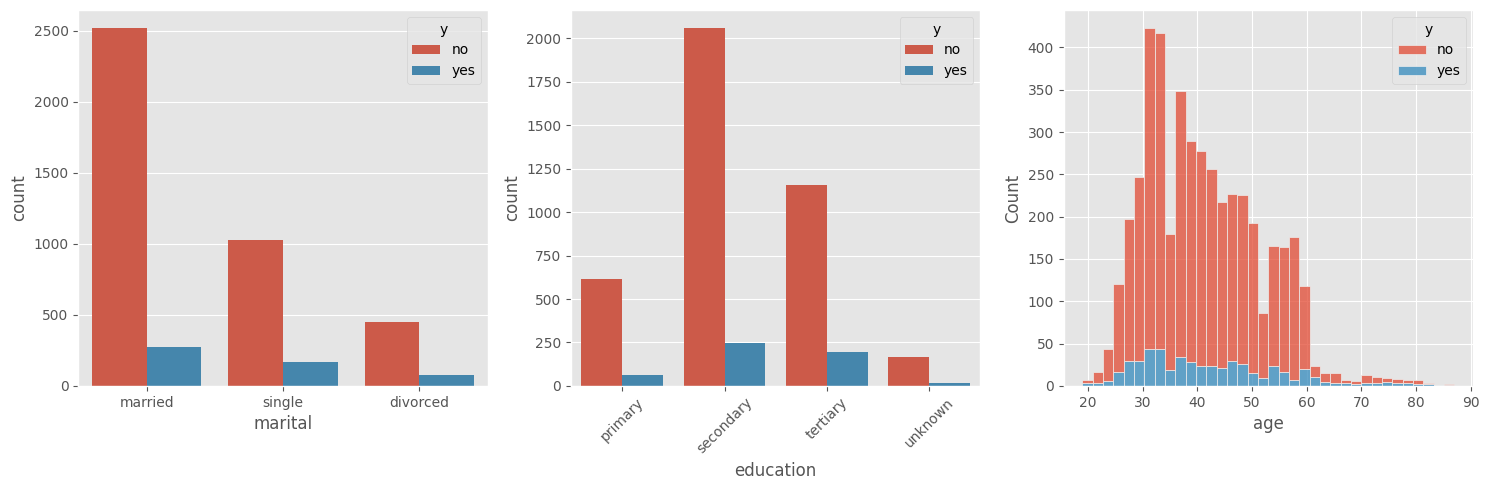

In [ ]:
# Create bar plots for each demographic feature
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='marital', hue='y')
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='education', hue='y')
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='age', hue='y', multiple='stack')
plt.tight_layout()
plt.show()

**Correlation using Heatmap** :

<ipython-input-18-37acfc441d1d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')


<Axes: title={'center': 'Correlation of Attributes'}>

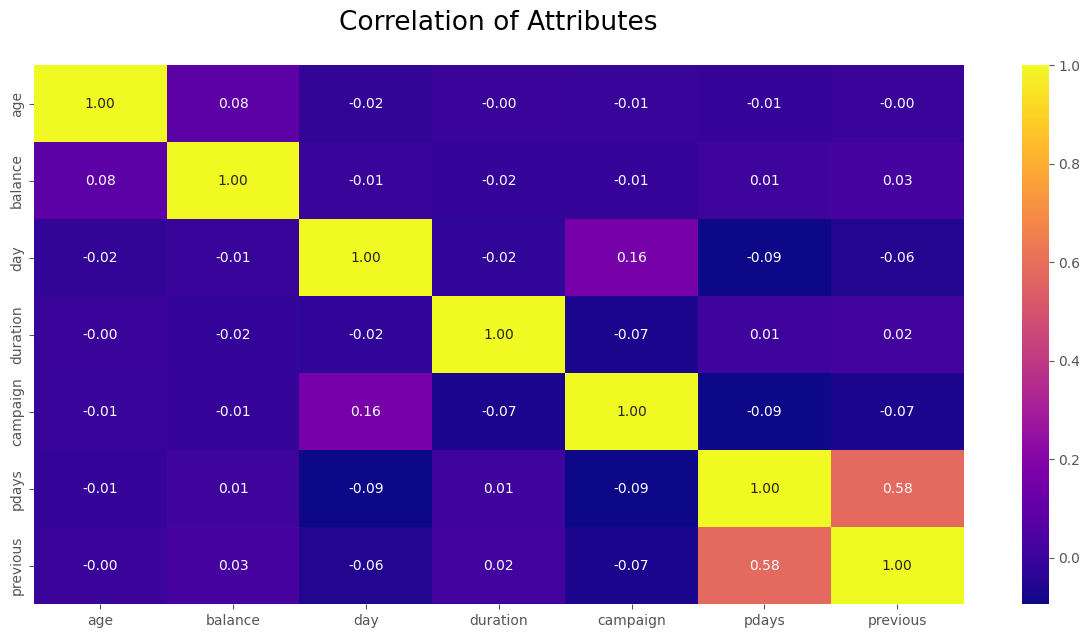

In [ ]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

**Dummy Variable**

In [ ]:
# Mapping job categories to binary values
job_mapping = {
    'unknown': 0,
    'services': 0,
    'unemployed': 0,
    'self-employed': 0,
    'entrepreneur': 0,
    'student': 0,
    'retired': 0,
    'management': 1,
    'blue-collar': 0,
    'technician': 1,
    'admin.': 1,
    'housemaid': 0
}

# Applying the mapping to the 'job' column
df['job'] = df['job'].map(job_mapping)

In [ ]:
# Mapping months to quarters
month_mapping = {
    'jan': 1, 'feb': 1, 'mar': 1,
    'apr': 2, 'may': 2, 'jun': 2,
    'jul': 3, 'aug': 3, 'sep': 3,
    'oct': 4, 'nov': 4, 'dec': 4
}
# Convert 'month' column to strings and create 'quarter' column based on the mapping
df['quarter'] = df['month'].astype(str).map(month_mapping)

# Use pd.get_dummies to create binary columns for each quarter
quarters_dummies = pd.get_dummies(df['quarter'], prefix='q')

# Concatenate the original DataFrame with the new binary columns
df = pd.concat([df, quarters_dummies], axis=1)

# Drop the original 'month' and 'quarter' columns if needed
df = df.drop(['month', 'quarter'], axis=1)

In [ ]:
df['education'].replace(['unknown','primary','secondary','tertiary'],[0,1,2,3],inplace=True)
df['default'].replace(['no','yes'],[0,1],inplace=True)
df['housing'].replace(['no','yes'],[0,1],inplace=True)
df['loan'].replace(['no','yes'],[0,1],inplace=True)
df['y'].replace(['no','yes'],[0,1],inplace=True)

In [ ]:
dummy = pd.get_dummies(df,drop_first = True)
dummy

,age,job,education,default,balance,housing,loan,day,duration,campaign,...,q_2,q_3,q_4,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1,0,1787,0,0,19,79,1,...,0,0,1,1,0,0,0,0,0,1
1,33,0,2,0,4789,1,1,11,220,1,...,1,0,0,1,0,0,0,0,0,0
2,35,1,3,0,1350,1,0,16,185,1,...,1,0,0,0,1,0,0,0,0,0
3,30,1,3,0,1476,1,1,3,199,4,...,1,0,0,1,0,0,1,0,0,1
4,59,0,2,0,0,1,0,5,226,1,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,2,0,-333,1,0,30,329,5,...,0,1,0,1,0,0,0,0,0,1
4517,57,0,3,1,-3313,1,1,9,153,1,...,1,0,0,1,0,0,1,0,0,1
4518,57,1,2,0,295,0,0,19,151,11,...,0,1,0,1,0,0,0,0,0,1
4519,28,0,2,0,1137,0,0,6,129,4,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
dummy.columns

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'q_1', 'q_2',
       'q_3', 'q_4', 'marital_married', 'marital_single', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

**PREPARING THE TRAIN AND TEST DATA**

In [ ]:
p_cols = ['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'q_1', 'q_2',
       'q_3', 'q_4', 'marital_married', 'marital_single', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']

In [ ]:
X = dummy[p_cols]
y = dummy.y

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
X_train.shape,X_test.shape

((3390, 23), (1131, 23))

**MULTI COLLINEARITY**

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X)

,variables,VIF
0,age,1.372282
1,job,1.212092
2,education,1.252154
3,default,1.014971
4,balance,1.047839
5,housing,1.247850
6,loan,1.026909
7,day,1.067175
8,duration,1.013688
9,campaign,1.088151


**MODEL BUILDING**

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)


 # Print results
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Create a KNN model with k=3 (you can adjust this parameter)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  accuracy_score

In [ ]:
# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


# Display the results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score

In [ ]:
# Create a linear SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

**BAGGING**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Create a Decision Tree base classifier
base_classifier = DecisionTreeClassifier()

# Create a Bagging Classifier with the base classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=500, random_state=0)

In [ ]:
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  random_state=0)

In [ ]:
y_pred = bagging_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


**GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Create a Gradient Boosting Classifier with desired hyperparameters
gbc = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.5, max_depth=3, random_state=0)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=1000, random_state=0)

In [ ]:
y_pred = gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


**XG-BOOST**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Create an XGBoost classifier with desired hyperparameters
xgb_classifier = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=0)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9027409372236959


Ada-boosting

In [ ]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize the AdaBoost model with a Decision Tree as the base estimator
base_model = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(base_model, n_estimators=1000, random_state=0)

In [ ]:
# Train the AdaBoost model
adaboost_model.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=1000, random_state=0)

In [ ]:

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


Neural network


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((3616, 20), (905, 20))

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
113/113 [==============================] - 1s 3ms/step - loss: 2.1960 - accuracy: 0.8139 - val_loss: 0.8258 - val_accuracy: 0.8365
Epoch 2/50
113/113 [==============================] - 0s 2ms/step - loss: 1.0052 - accuracy: 0.8407 - val_loss: 0.9748 - val_accuracy: 0.8906
Epoch 3/50
113/113 [==============================] - 0s 2ms/step - loss: 0.9459 - accuracy: 0.8606 - val_loss: 1.2490 - val_accuracy: 0.8906
Epoch 4/50
113/113 [==============================] - 0s 2ms/step - loss: 1.2493 - accuracy: 0.8319 - val_loss: 1.0545 - val_accuracy: 0.8884
Epoch 5/50
113/113 [==============================] - 0s 2ms/step - loss: 0.8869 - accuracy: 0.8545 - val_loss: 0.4429 - val_accuracy: 0.8751
Epoch 6/50
113/113 [==============================] - 0s 2ms/step - loss: 1.1004 - accuracy: 0.8507 - val_loss: 1.0228 - val_accuracy: 0.7304
Epoch 7/50
113/113 [==============================] - 0s 2ms/step - loss: 0.9141 - accuracy: 0.8540 - val_loss: 1.0117 - val_accuracy: 0.8917
Epoch 

In [ ]:
# Assuming you have more than two classes
# Make predictions on the test set
y_pred_proba = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_proba, axis=1)

29/29 [==============================] - 0s 1ms/step


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [ ]:
# Display the architecture of the neural network
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                1536      
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3649 (14.25 KB)
Trainable params: 3649 (14.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


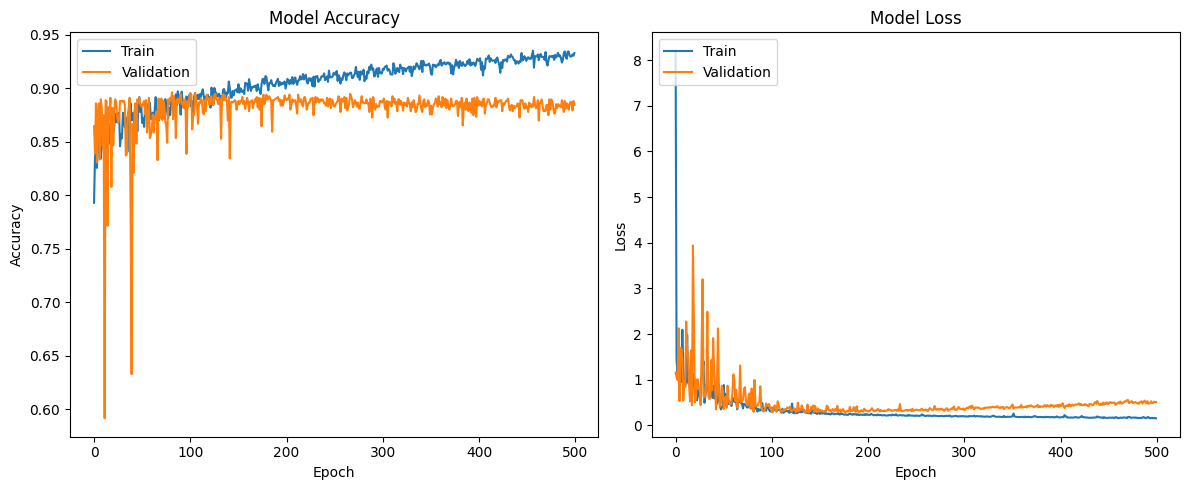

In [ ]:
import matplotlib.pyplot as plt
# Plot the training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')